In [5]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv(r"sentiment.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'sentiment.csv'

In [8]:
df.shape

(8518, 8)

In [9]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [10]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [11]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [12]:
#Renaming the columns
df.columns=df.columns.str.strip()
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [14]:
#Check for missing values
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [15]:
#Handling missing values and Null values
df.fillna({'Reviewer Name': 'Anonymous',
           'Review Title': 'No Title',
           'Place of Review': 'Unknown',
           'Up Votes': df['Up Votes'].median(),
           'Down Votes': df['Down Votes'].median(),
           'Month': 'Unknown'},
          inplace=True)

In [16]:
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [17]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,5
8514,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,2
8515,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4
8516,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,1
8517,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4


In [18]:
# Convert 'Month' column to datetime data type
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

<ipython-input-18-751f24177884>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce')


In [19]:
# Convert 'Up Votes' and 'Down Votes' columns to integer data type
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [20]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int64
Down_Votes                  int64
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


In [21]:
#Summary Statistics
print(df.describe())

          Up_Votes   Down_Votes                          Month      Ratings
count  8518.000000  8518.000000                           8053  8518.000000
mean      0.390937     0.121625  2019-12-11 02:10:53.570098432     4.181028
min       0.000000     0.000000            2015-12-01 00:00:00     1.000000
25%       0.000000     0.000000            2018-10-01 00:00:00     4.000000
50%       0.000000     0.000000            2020-02-01 00:00:00     5.000000
75%       0.000000     0.000000            2021-02-01 00:00:00     5.000000
max     889.000000   219.000000            2022-11-01 00:00:00     5.000000
std      11.607097     3.246117                            NaN     1.262200


In [22]:
# Distribution of ratings
print(df['Ratings'].value_counts())

Ratings
5    5080
4    1746
1     769
3     615
2     308
Name: count, dtype: int64


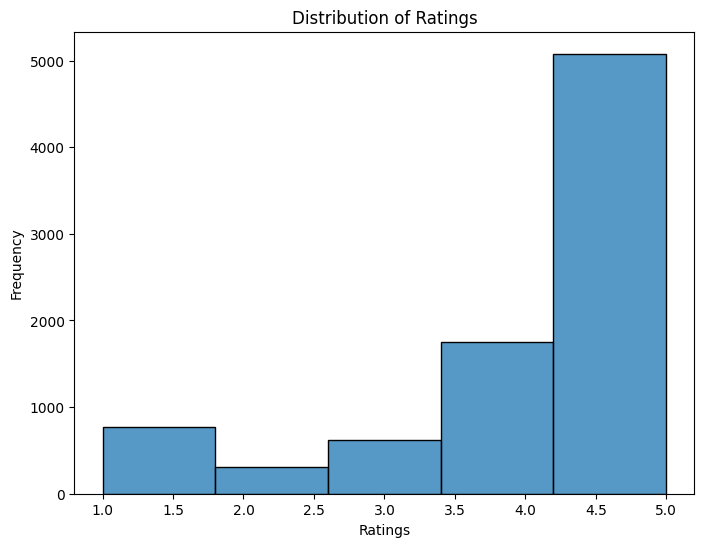

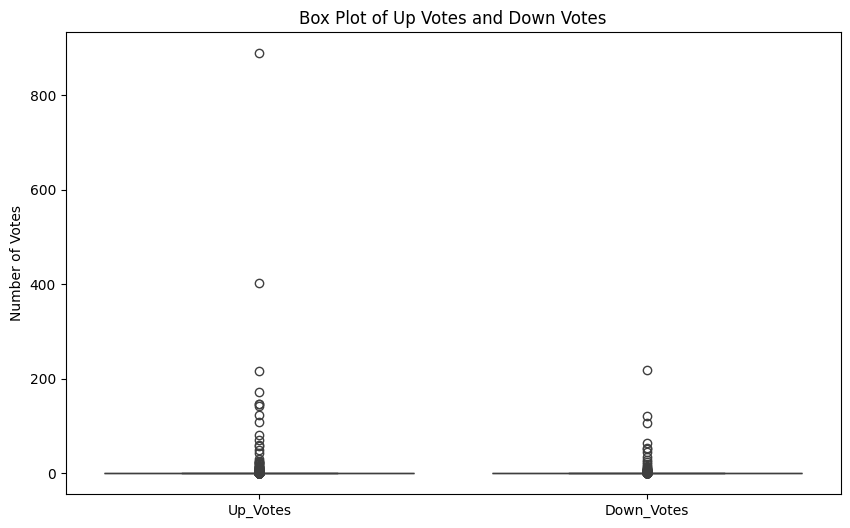

In [23]:
#Data Vizualization
#Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Box plot of Up Votes and Down Votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()

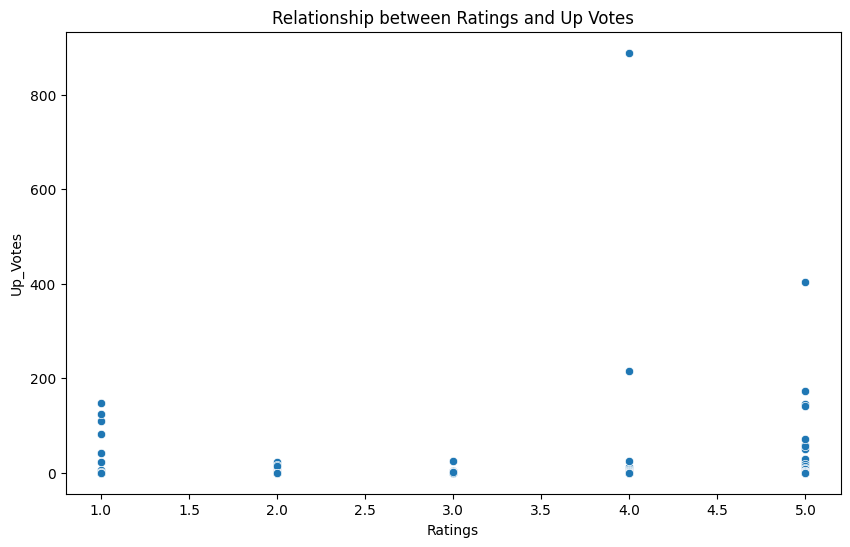

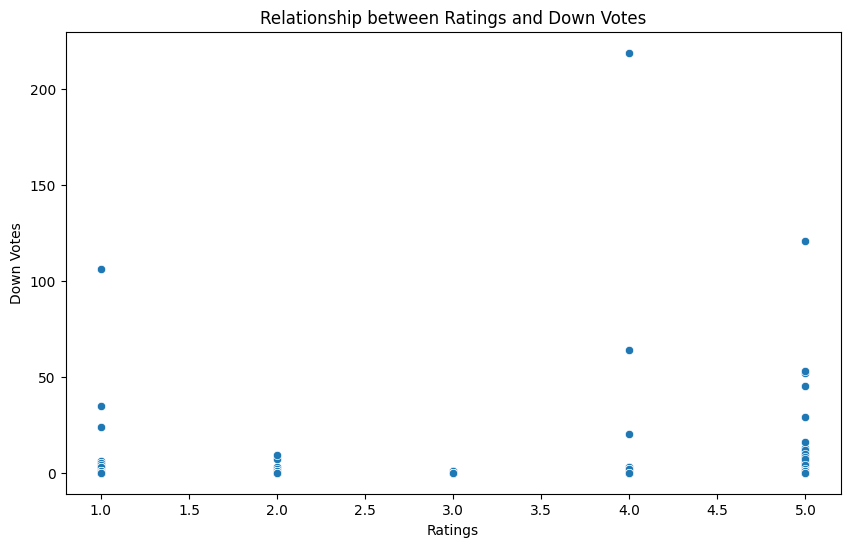

In [24]:
# Analyzing the Relationship between Ratings and Engagement Metrics:

import seaborn as sns

# Scatter plot to visualize the relationship between Ratings and Up Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()

# Scatter plot to visualize the relationship between Ratings and Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Relationship between Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()

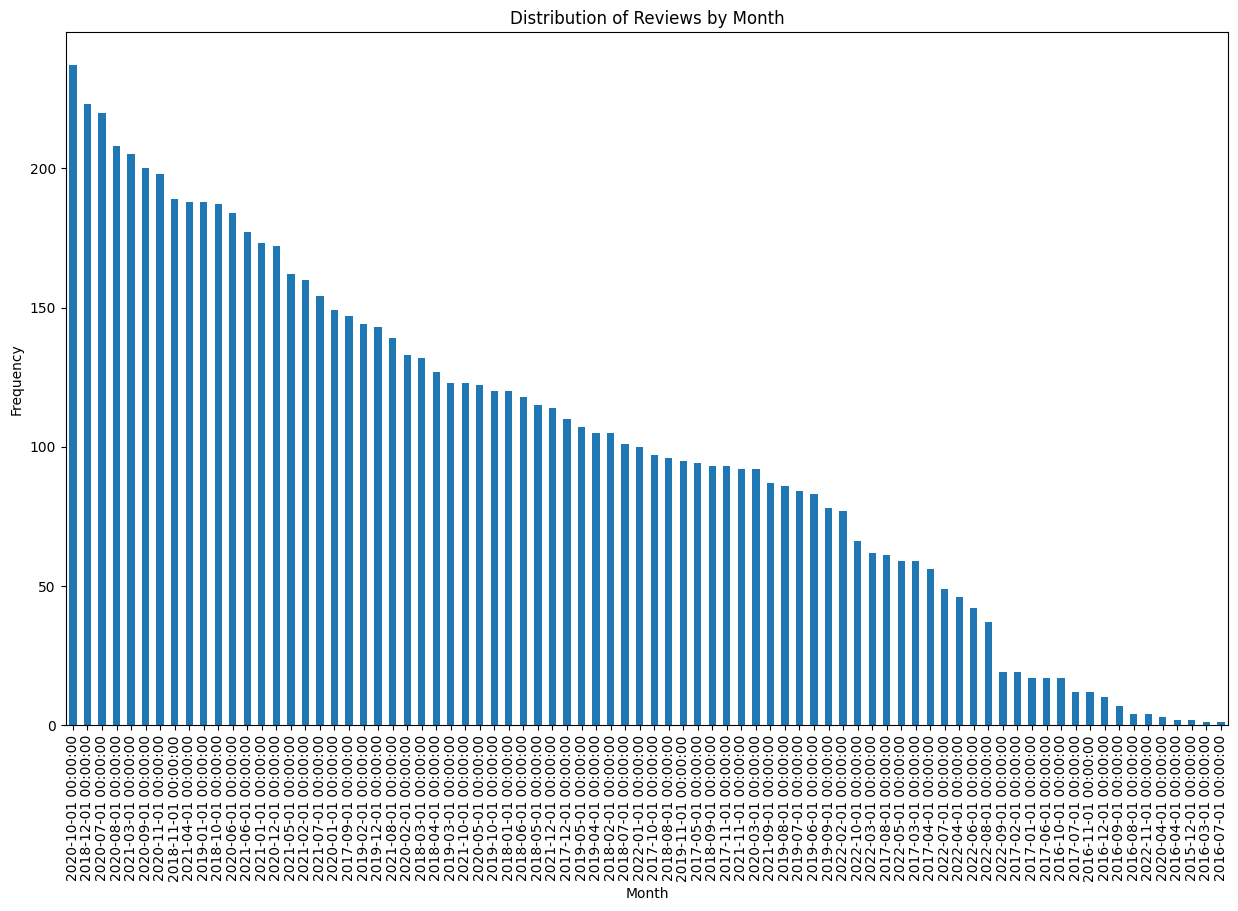

In [25]:
#Categorical Variable Analysis

plt.figure(figsize=(15, 9))
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for NaN values

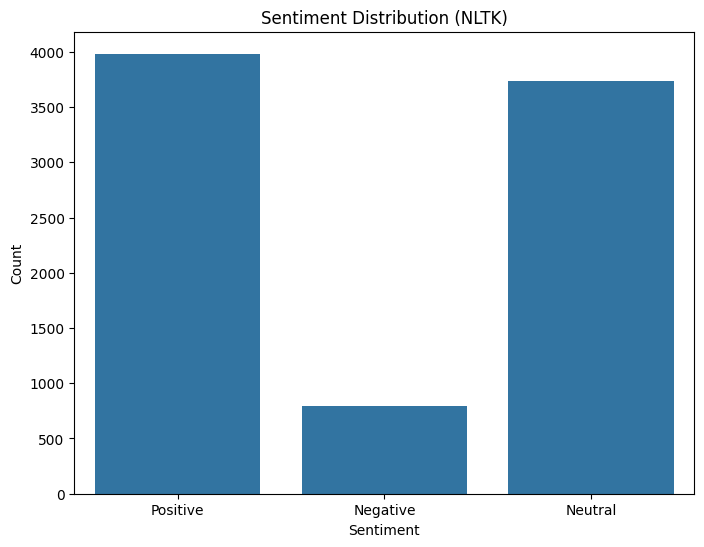

In [28]:
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [29]:
#Text Data
# Distribution on target variable looks non-uniform
df['Sentiment_NLTK'].value_counts(normalize=True)

Sentiment_NLTK
Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: proportion, dtype: float64

In [30]:
# removing the data where we don't want, i.e.'netural'.
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4780, 9)

In [31]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Sentiment_NLTK
Positive    0.833264
Negative    0.166736
Name: proportion, dtype: float64

In [32]:
## Iam choosing Sentiment_NLTK for sentiment analysis
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())

  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


<ipython-input-32-275b164db8e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)


In [33]:
df.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [34]:
# Let us take only the two columns we need
df = df[["Review_text", "Sentiment_NLTK_numeric"]]
df.shape

(4780, 2)

In [35]:
# Step 1: Identify Input and Output

X = df.Review_text # the column text contains textual data to extract features from
y = df.Sentiment_NLTK_numeric # this is the column we are learning to predict.
print(X.shape, y.shape)

(4780,) (4780,)


In [36]:
# Step 2: Split the data into train and test

from sklearn.model_selection import train_test_split

# split X and y into training and testing sets.
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3585,) (3585,)
(1195,) (1195,)


In [37]:
#Step 3:Data Preprocessing on train data (X_train)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

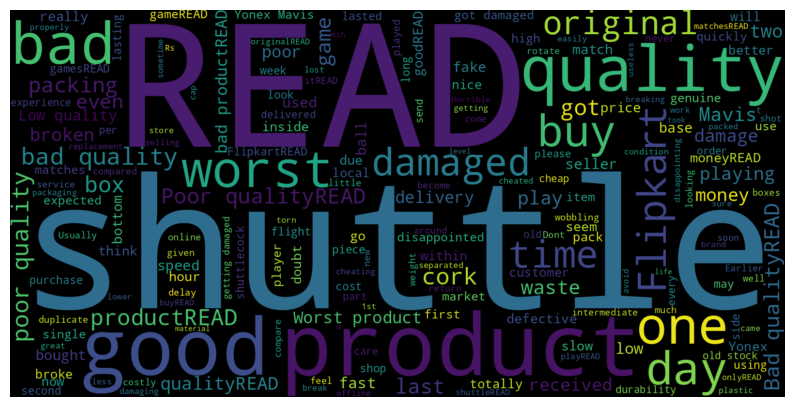

In [38]:
# Import the required modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to display word cloud
def display_wordcloud(data):
    # Generate the word cloud with the default font
    wc = WordCloud(background_color='black', width=1600, height=800).generate(' '.join(data))

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Assuming X_train contains Flipkart review text data
# and y_train contains corresponding sentiment labels
# Display the word cloud for positive sentiment Flipkart reviews
display_wordcloud(X_train[y_train ==0])

In [47]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [58]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 1.28 s, sys: 79.5 ms, total: 1.36 s
Wall time: 1.38 s
(3585, 2547)


In [56]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1195, 2547)


In [57]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 4.74 ms, sys: 0 ns, total: 4.74 ms
Wall time: 19.9 ms


MultinomialNB()

In [59]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9617852161785216

In [60]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 503,   99],
       [  38, 2945]])

Text(0.5, 23.52222222222222, 'Predicted')

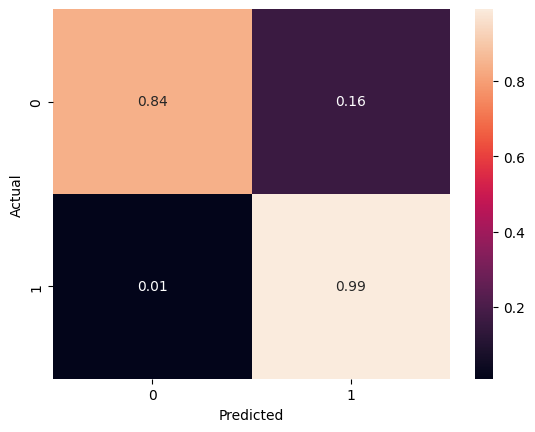

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [62]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9372384937238494

Text(0.5, 23.52222222222222, 'Predicted')

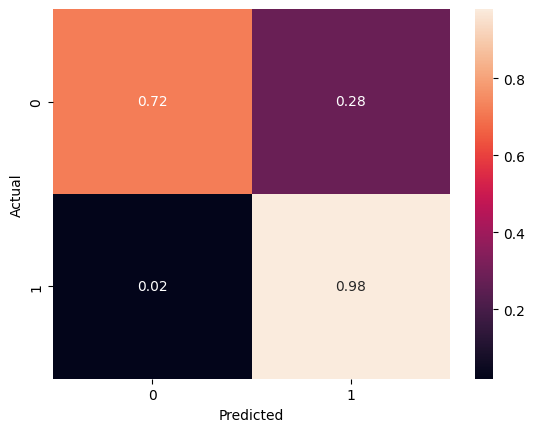

In [63]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [64]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.977268956363033
Test Score (F1 Score): 0.9631087063453025


In [65]:
#Creating an Optimal WorkFlow


from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [66]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 19s, sys: 5.03 s, total: 1min 24s
Wall time: 1min 36s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7801df67edd0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


In [67]:
#Caching to Optimize the runtime
import joblib
from joblib import Memory

import os

In [68]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 57.9 s, sys: 3.51 s, total: 1min 1s
Wall time: 1min 2s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7801df67edd0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


In [69]:
best_model = clf.best_estimator_

joblib.dump(best_model, r'/content/reviews_badminton\model_nb.pkl')

['/content/reviews_badminton\\model_nb.pkl']

In [70]:
# Deserialization
model = joblib.load(r'/content/reviews_badminton\model_nb.pkl')
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0 1]


In [71]:
#Here 1 means 'relevant' and 0 means 'not relevant'.
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: user 660 ms, sys: 61 ms, total: 721 ms
Wall time: 1.25 s
Test Score (F1): 0.9642857142857142


In [72]:
print("Model Size:", os.path.getsize('/content/reviews_badminton\model_nb.pkl'), "Bytes")


Model Size: 85975 Bytes


In [73]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 1.87 s, sys: 131 ms, total: 2 s
Wall time: 2.5 s


In [74]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: user 618 ms, sys: 37.6 ms, total: 656 ms
Wall time: 715 ms


In [75]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 4.86 s, sys: 34 ms, total: 4.9 s
Wall time: 7.11 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857142


In [76]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, "/content/reviews_badminton\model_nb_unclean.pkl")

['/content/reviews_badminton\\model_nb_unclean.pkl']

In [77]:
# Deserialization

model = joblib.load("/content/reviews_badminton\model_nb_unclean.pkl")
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0 1]


In [78]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: user 15.8 ms, sys: 0 ns, total: 15.8 ms
Wall time: 22.7 ms
Test Score (F1): 0.9642857142857142


In [79]:
print("Model Size:", os.path.getsize("/content/reviews_badminton\model_nb_unclean.pkl"), "Bytes")

Model Size: 85959 Bytes


In [80]:
#Putting it all together:Implementing various Algorithms to find the best Model
import warnings

warnings.filterwarnings('ignore')

In [81]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 4.83 s, sys: 31.6 ms, total: 4.86 s
Wall time: 5.21 s
Score on Test Data:  0.9642857142857142
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 19.4 s, sys: 90.5 ms, total: 19.5 s
Wall time: 21 s
Score on Test Data:  0.9587578845220767
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 4min 55s, sys: 487 ms, total: 4min 55s
Wall time: 5min 14s
Score on Test Data:  0.9585621567648526


In [82]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.5,
                                    penalty='elasticnet', solver='saga'))])



In [83]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'/content/reviews_badminton\\{name}.pkl')
    model = joblib.load(f'/content/reviews_badminton\\{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'/content/reviews_badminton\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 14.4 ms
Test Score (F1) 0.9642857142857142
Model Size: 85959 Bytes
********** decision_tree **********
CPU times: user 15.6 ms, sys: 968 µs, total: 16.6 ms
Wall time: 16.5 ms
Test Score (F1) 0.9587578845220767
Model Size: 116781 Bytes
********** logistic_regression **********
CPU times: user 13.1 ms, sys: 1 ms, total: 14.2 ms
Wall time: 18.9 ms
Test Score (F1) 0.9585621567648526
Model Size: 97850 Bytes
